In [28]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [29]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Categorical.from_codes(wine.target, wine.target_names)

X.head()
print(X)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

Linear Discriminant Analysis

In [35]:
df = X.join(pd.Series(y, name='class'))
print(df)
class_feature_means = pd.DataFrame(columns=wine.target_names)
for c, rows in df.groupby('class'):
    class_feature_means[c] = rows.mean()
class_feature_means

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

,class_0,class_1,class_2
alcohol,13.744746,12.278732,13.153750
malic_acid,2.010678,1.932676,3.333750
ash,2.455593,2.244789,2.437083
alcalinity_of_ash,17.037288,20.238028,21.416667
magnesium,106.338983,94.549296,99.312500
total_phenols,2.840169,2.258873,1.678750
flavanoids,2.982373,2.080845,0.781458
nonflavanoid_phenols,0.290000,0.363662,0.447500
proanthocyanins,1.899322,1.630282,1.153542
color_intensity,5.528305,3.086620,7.396250


In [37]:
within_class_scatter_matrix = np.zeros((13,13))
for c, rows in df.groupby('class'):
    rows = rows.drop(['class'], axis=1)
    s = np.zeros((13,13))
    for index, row in rows.iterrows():
        x, mc = row.values.reshape(13,1), class_feature_means[c].values.reshape(13,1)
        s += (x - mc).dot((x - mc).T)
    within_class_scatter_matrix += s
within_class_scatter_matrix.shape

(13, 13)

In [38]:
feature_means = df.mean()
between_class_scatter_matrix = np.zeros((13,13))
for c in class_feature_means:    
    n = len(df.loc[df['class'] == c].index) 
    mc, m = class_feature_means[c].values.reshape(13,1), feature_means.values.reshape(13,1)
    between_class_scatter_matrix += n*((mc - m).dot((mc - m).T))
between_class_scatter_matrix.shape

(13, 13)

In [39]:
eigen_values, eigen_vectors = np.linalg.eig((np.linalg.inv(within_class_scatter_matrix)).dot(between_class_scatter_matrix))

In [40]:
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])

9.081739435042472
4.128469045639484
8.881784197001252e-16
7.41949604398113e-16
7.41949604398113e-16
6.57104310784389e-16
6.57104310784389e-16
2.9039090283069212e-16
2.9039090283069212e-16
2.58525572226227e-16
6.126103277916086e-17
6.126103277916086e-17
4.86945776983596e-17


In [42]:
w_matrix = np.hstack((pairs[0][1].reshape(13,1), pairs[1][1].reshape(13,1))).real
w_matrix.shape

(13, 2)

(178, 2)


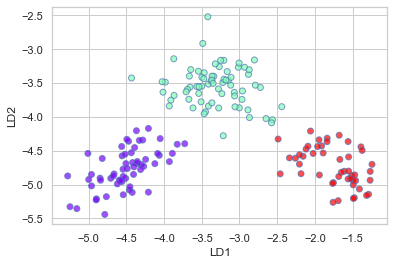

In [43]:
X_lda = np.array(X.dot(w_matrix))
print(X_lda.shape)
le = LabelEncoder()
y = le.fit_transform(df['class'])
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

Principal Component Ananlysis

In [44]:
meanmat1=np.mean(X,axis=0)
subs1=X-meanmat1
subs1.shape

(178, 13)

In [45]:
covm=np.dot(subs1.T,subs1)
cov1=covm/X.shape[0]
cov1

array([[ 6.5536e-01,  8.5130e-02,  4.6850e-02, -8.3637e-01,  3.1222e+00,
         1.4606e-01,  1.9095e-01, -1.5666e-02,  6.3161e-02,  1.0225e+00,
        -1.3239e-02,  4.1464e-02,  1.6364e+02],
       [ 8.5130e-02,  1.2410e+00,  4.9995e-02,  1.0703e+00, -8.6589e-01,
        -2.3302e-01, -4.5605e-01,  4.0505e-02, -1.4035e-01,  6.4122e-01,
        -1.4252e-01, -2.9080e-01, -6.7169e+01],
       [ 4.6850e-02,  4.9995e-02,  7.4842e-02,  4.0393e-01,  1.1166e+00,
         2.2021e-02,  3.1358e-02,  6.3227e-03,  1.5071e-03,  1.6373e-01,
        -4.6559e-03,  7.5756e-04,  1.9211e+01],
       [-8.3637e-01,  1.0703e+00,  4.0393e-01,  1.1090e+01, -3.9524e+00,
        -6.6738e-01, -1.1655e+00,  1.4958e-01, -3.7506e-01,  1.4421e-01,
        -2.0794e-01, -6.5255e-01, -4.6075e+02],
       [ 3.1222e+00, -8.6589e-01,  1.1166e+00, -3.9524e+00,  2.0284e+02,
         1.9057e+00,  2.7774e+00, -4.5300e-01,  1.9220e+00,  6.5833e+00,
         1.7984e-01,  6.6555e-01,  1.7592e+03],
       [ 1.4606e-01, -2.3302e-

In [46]:
eig1,eigv1=np.linalg.eig(cov1)
result=np.dot(X,eigv1)
eigv1_1=eigv1[:,[0,1]] 
print(eig1)
print(eigv1_1)

[9.8644e+04 1.7157e+02 9.3851e+00 4.9631e+00 1.2219e+00 8.3634e-01
 2.7741e-01 1.5053e-01 1.1147e-01 8.1576e-03 2.0954e-02 3.7365e-02
 7.1300e-02]
[[-1.6593e-03 -1.2034e-03]
 [ 6.8102e-04 -2.1550e-03]
 [-1.9491e-04 -4.5937e-03]
 [ 4.6713e-03 -2.6450e-02]
 [-1.7868e-02 -9.9934e-01]
 [-9.8983e-04 -8.7796e-04]
 [-1.5673e-03  5.1851e-05]
 [ 1.2309e-04  1.3545e-03]
 [-6.0061e-04 -5.0044e-03]
 [-2.3271e-03 -1.5100e-02]
 [-1.7138e-04  7.6267e-04]
 [-7.0493e-04  3.4954e-03]
 [-9.9982e-01  1.7774e-02]]


In [47]:
#Transform data using eigen vectors
result1=np.dot(X,eigv1_1)
result1

array([[-1067.0557,  -108.5163],
       [-1051.5901,   -81.6594],
       [-1186.5538,   -80.4868],
       [-1481.7328,   -87.2169],
       [ -736.9213,  -105.5141],
       [-1451.7239,   -86.692 ],
       [-1291.4643,   -73.5052],
       [-1296.8946,   -98.4736],
       [-1046.5296,   -78.844 ],
       [-1046.5423,   -79.9226],
       [-1511.5724,   -78.6898],
       [-1281.4359,   -72.7365],
       [-1321.3271,   -66.0191],
       [-1151.4181,   -70.9215],
       [-1548.5461,   -74.9057],
       [-1311.7383,   -89.239 ],
       [-1281.8724,   -97.8289],
       [-1131.8103,   -95.5015],
       [-1681.6111,   -78.6696],
       [ -846.8959,  -101.4168],
       [ -782.0863,  -112.5921],
       [ -771.6391,   -88.8416],
       [-1036.5857,   -83.0611],
       [-1016.4742,   -77.4534],
       [ -846.5126,   -81.5283],
       [ -831.9915,  -109.9157],
       [-1196.4183,   -72.2268],
       [-1286.4119,   -71.6358],
       [ -916.7032,   -91.2794],
       [-1036.501 ,   -78.0644],
       [-1

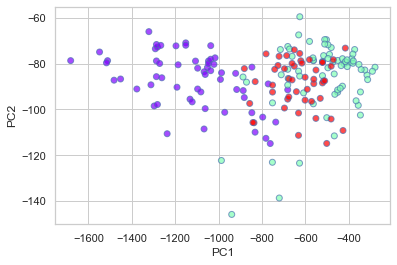

In [48]:
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(
    result1[:, 0],
    result1[:, 1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)